In [1]:
from ultralytics import YOLO

In [2]:
model = YOLO("yolo11n.pt")

In [ ]:
# Train the model

data_path = "D:\Licence Plate Recognition\License Plate Recognition.v4-resized640_aug3x-accurate.yolov11\data.yaml"
train_results = model.train(
    data = data_path,  # path to dataset YAML
    epochs = 10,  # number of training epochs
    imgsz = 640,  # training image size
    device = 0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)



In [3]:
# trained_model = YOLO('runs/detect/train/weights/best.pt')
trained_model = YOLO('D:\License Plate Recognition\\runs\detect\\train\weights\\best.pt')


In [8]:
# Evaluate the model
metrics = trained_model.val(data= "D:\License Plate Recognition\License Plate Recognition.v4-resized640_aug3x-accurate.yolov11\data.yaml")

Ultralytics 8.3.74  Python-3.10.11 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)


val: Scanning D:\License Plate Recognition\License Plate Recognition.v4-resized640_aug3x-accurate.yolov11\valid\labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [00:21<00:00,  5.85it/s]


                   all       2046       2132      0.984      0.949      0.982       0.69
Speed: 0.4ms preprocess, 7.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\val16


In [39]:
metrics_score = metrics.results_dict

for i in metrics_score:
    print(f"{i}: {metrics_score[i]:0.4f}")

metrics/precision(B): 0.9840
metrics/recall(B): 0.9493
metrics/mAP50(B): 0.9816
metrics/mAP50-95(B): 0.6904
fitness: 0.7195


In [4]:

# Perform object detection on an image
results = trained_model("D:\License Plate Recognition\License Plate Recognition.v4-resized640_aug3x-accurate.yolov11\\test\images\\00a7d31c6cc6b7f3_jpg.rf.2707e63f5c51f113de704441ea210a65.jpg")
results[0].show()



image 1/1 D:\License Plate Recognition\License Plate Recognition.v4-resized640_aug3x-accurate.yolov11\test\images\00a7d31c6cc6b7f3_jpg.rf.2707e63f5c51f113de704441ea210a65.jpg: 640x640 1 License_Plate, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 76.8ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
results[0].boxes.data.tolist()[0]

[383.39666748046875,
 326.63934326171875,
 506.19305419921875,
 419.24249267578125,
 0.7806203365325928,
 0.0]

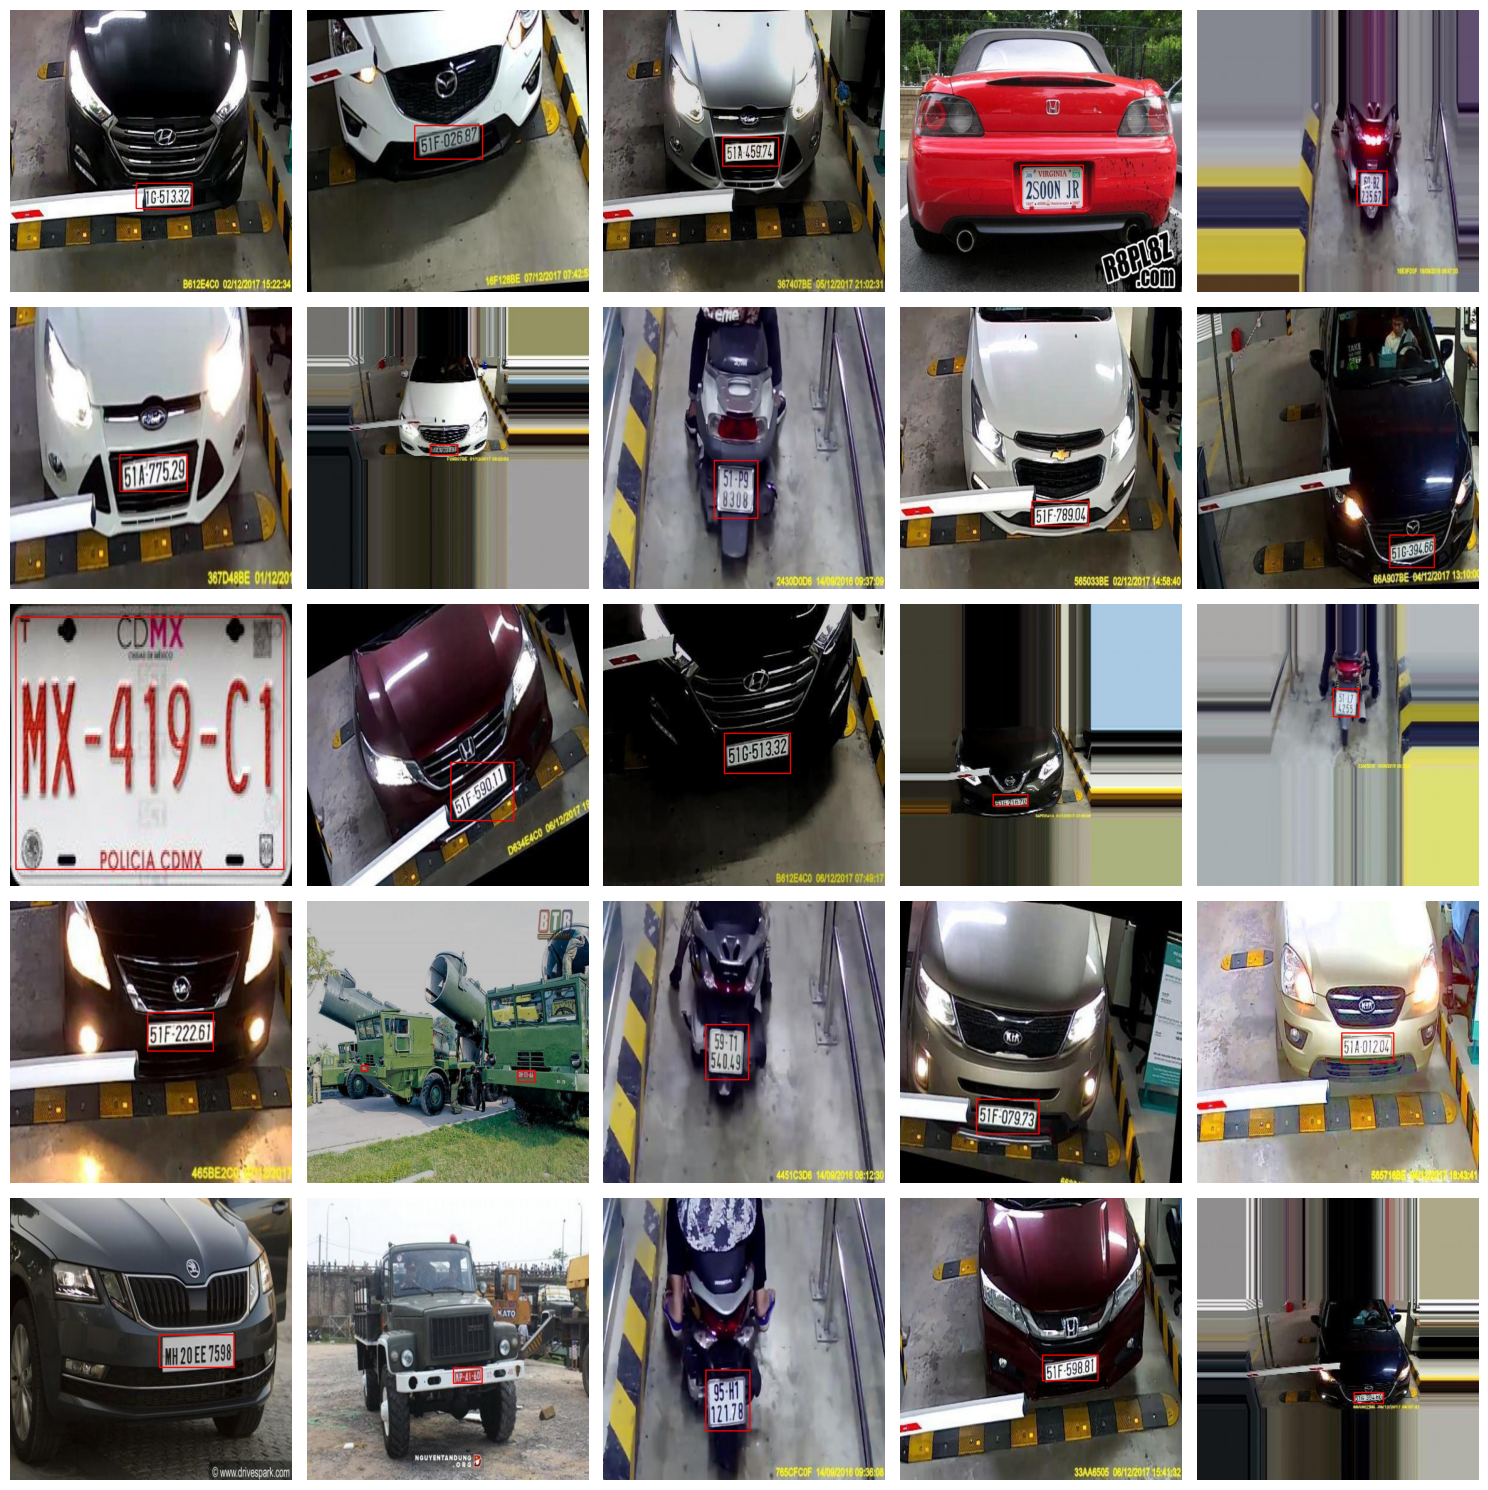

In [6]:
import os
import random
import cv2
import matplotlib.pyplot as plt

image_dir = "License Plate Recognition.v4-resized640_aug3x-accurate.yolov11\\test\images"
label_dir = "License Plate Recognition.v4-resized640_aug3x-accurate.yolov11/test/labels"

image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir)]

# Reading and displaying 25 random images with bounding box around the license plates

random_images = random.sample(image_paths, 25)

def read_bboxes(label_path, img_width, img_height):
    bboxes = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                data = line.strip().split()
                class_id, x, y, w, h = map(float, data)
                
                # Convert normalized YOLO format to pixel coordinates
                x1 = int((x - w / 2) * img_width)
                y1 = int((y - h / 2) * img_height)
                x2 = int((x + w / 2) * img_width)
                y2 = int((y + h / 2) * img_height)

                bboxes.append((class_id, x1, y1, x2, y2))
    return bboxes

plt.figure(figsize=(15, 15))
for i, img_path in enumerate(random_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_height, img_width, _ = img.shape
    
    label_path = os.path.join(label_dir, os.path.basename(img_path).replace('.jpg', '.txt'))
    
    bboxes = read_bboxes(label_path, img_width, img_height)
    
    for _, x1, y1, x2, y2 in bboxes:
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()


image 1/1 d:\License Plate Recognition\License Plate Recognition.v4-resized640_aug3x-accurate.yolov11\test\images\CarLongPlate955_jpg.rf.7588ef080e6c36397b863f3a8a3a7047.jpg: 640x640 1 License_Plate, 105.8ms
Speed: 8.5ms preprocess, 105.8ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\License Plate Recognition\License Plate Recognition.v4-resized640_aug3x-accurate.yolov11\test\images\CarLongPlateGen3551_jpg.rf.e67601b602f4ba69b55f2eab4c2fcf9a.jpg: 640x640 1 License_Plate, 20.0ms
Speed: 0.0ms preprocess, 20.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\License Plate Recognition\License Plate Recognition.v4-resized640_aug3x-accurate.yolov11\test\images\CarLongPlateGen1356_jpg.rf.a6ee6e8adcc575df56bbf2dd88a8ba49.jpg: 640x640 1 License_Plate, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\License Plate Recognition\License Plate Recognition.v4-resized6

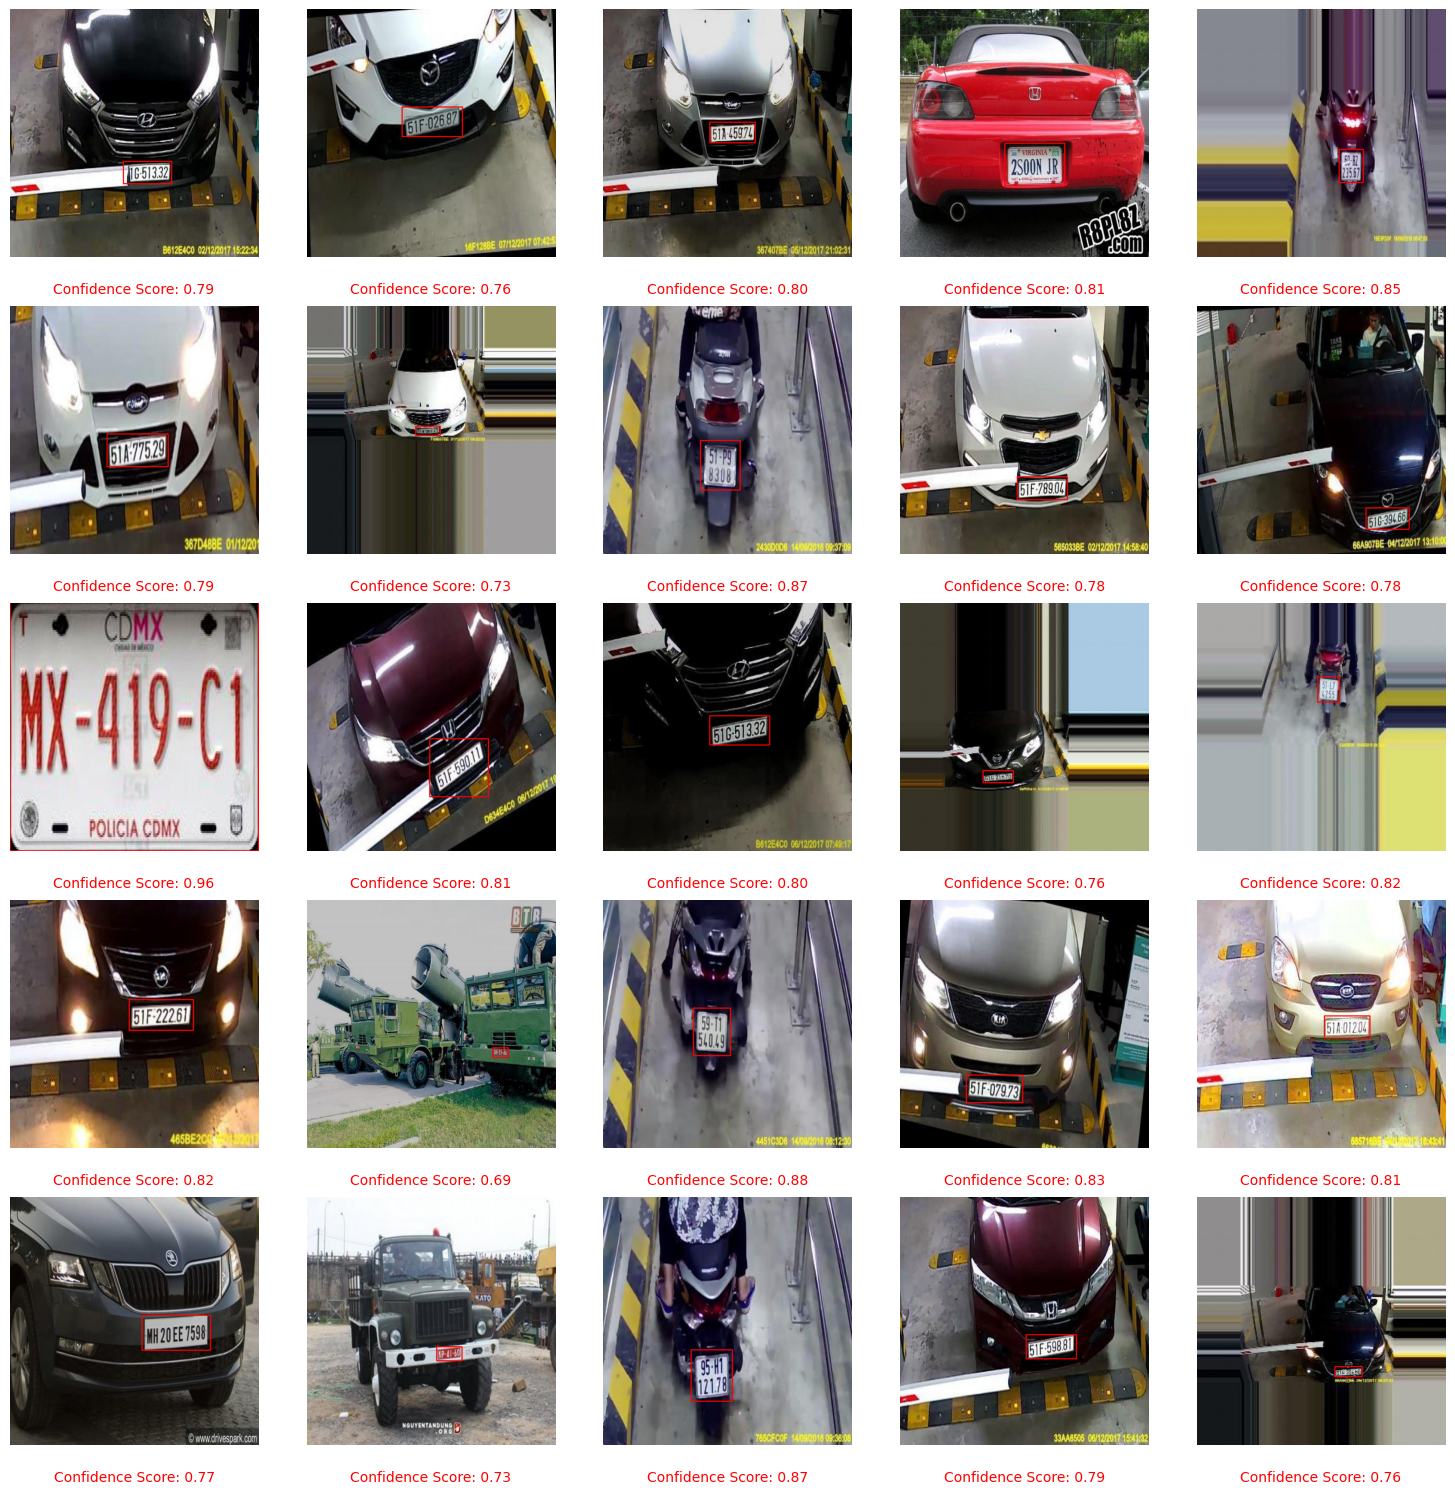

In [7]:
# Using YOLO model to predict license plate bonuding boxes (25 random images) and plotting them along with confidence score

conf_score_lst = []

plt.figure(figsize=(15, 15))
for i, img_path in enumerate(random_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_height, img_width, _ = img.shape
    
    detection = trained_model(img_path)[0]
    if(len(detection) > 0):

        bboxes = detection.boxes.data.tolist()[0][:5]
        x1, y1, x2, y2, conf_score = bboxes
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

        conf_score_lst.append(conf_score)
    else:
        conf_score_lst.append(0)

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.text(0.5, -0.1, f"Confidence Score: {conf_score_lst[i]:.2f}", ha='center', va='top', transform=plt.gca().transAxes, fontsize=10, color='red')
    plt.axis("off")


plt.tight_layout()
plt.show()


image 1/1 d:\License Plate Recognition\License Plate Recognition.v4-resized640_aug3x-accurate.yolov11\test\images\CarLongPlate955_jpg.rf.7588ef080e6c36397b863f3a8a3a7047.jpg: 640x640 1 License_Plate, 9.6ms
Speed: 5.0ms preprocess, 9.6ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\License Plate Recognition\License Plate Recognition.v4-resized640_aug3x-accurate.yolov11\test\images\CarLongPlateGen3551_jpg.rf.e67601b602f4ba69b55f2eab4c2fcf9a.jpg: 640x640 1 License_Plate, 15.3ms
Speed: 0.0ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\License Plate Recognition\License Plate Recognition.v4-resized640_aug3x-accurate.yolov11\test\images\CarLongPlateGen1356_jpg.rf.a6ee6e8adcc575df56bbf2dd88a8ba49.jpg: 640x640 1 License_Plate, 15.5ms
Speed: 0.0ms preprocess, 15.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\License Plate Recognition\License Plate Recognition.v4-resized640

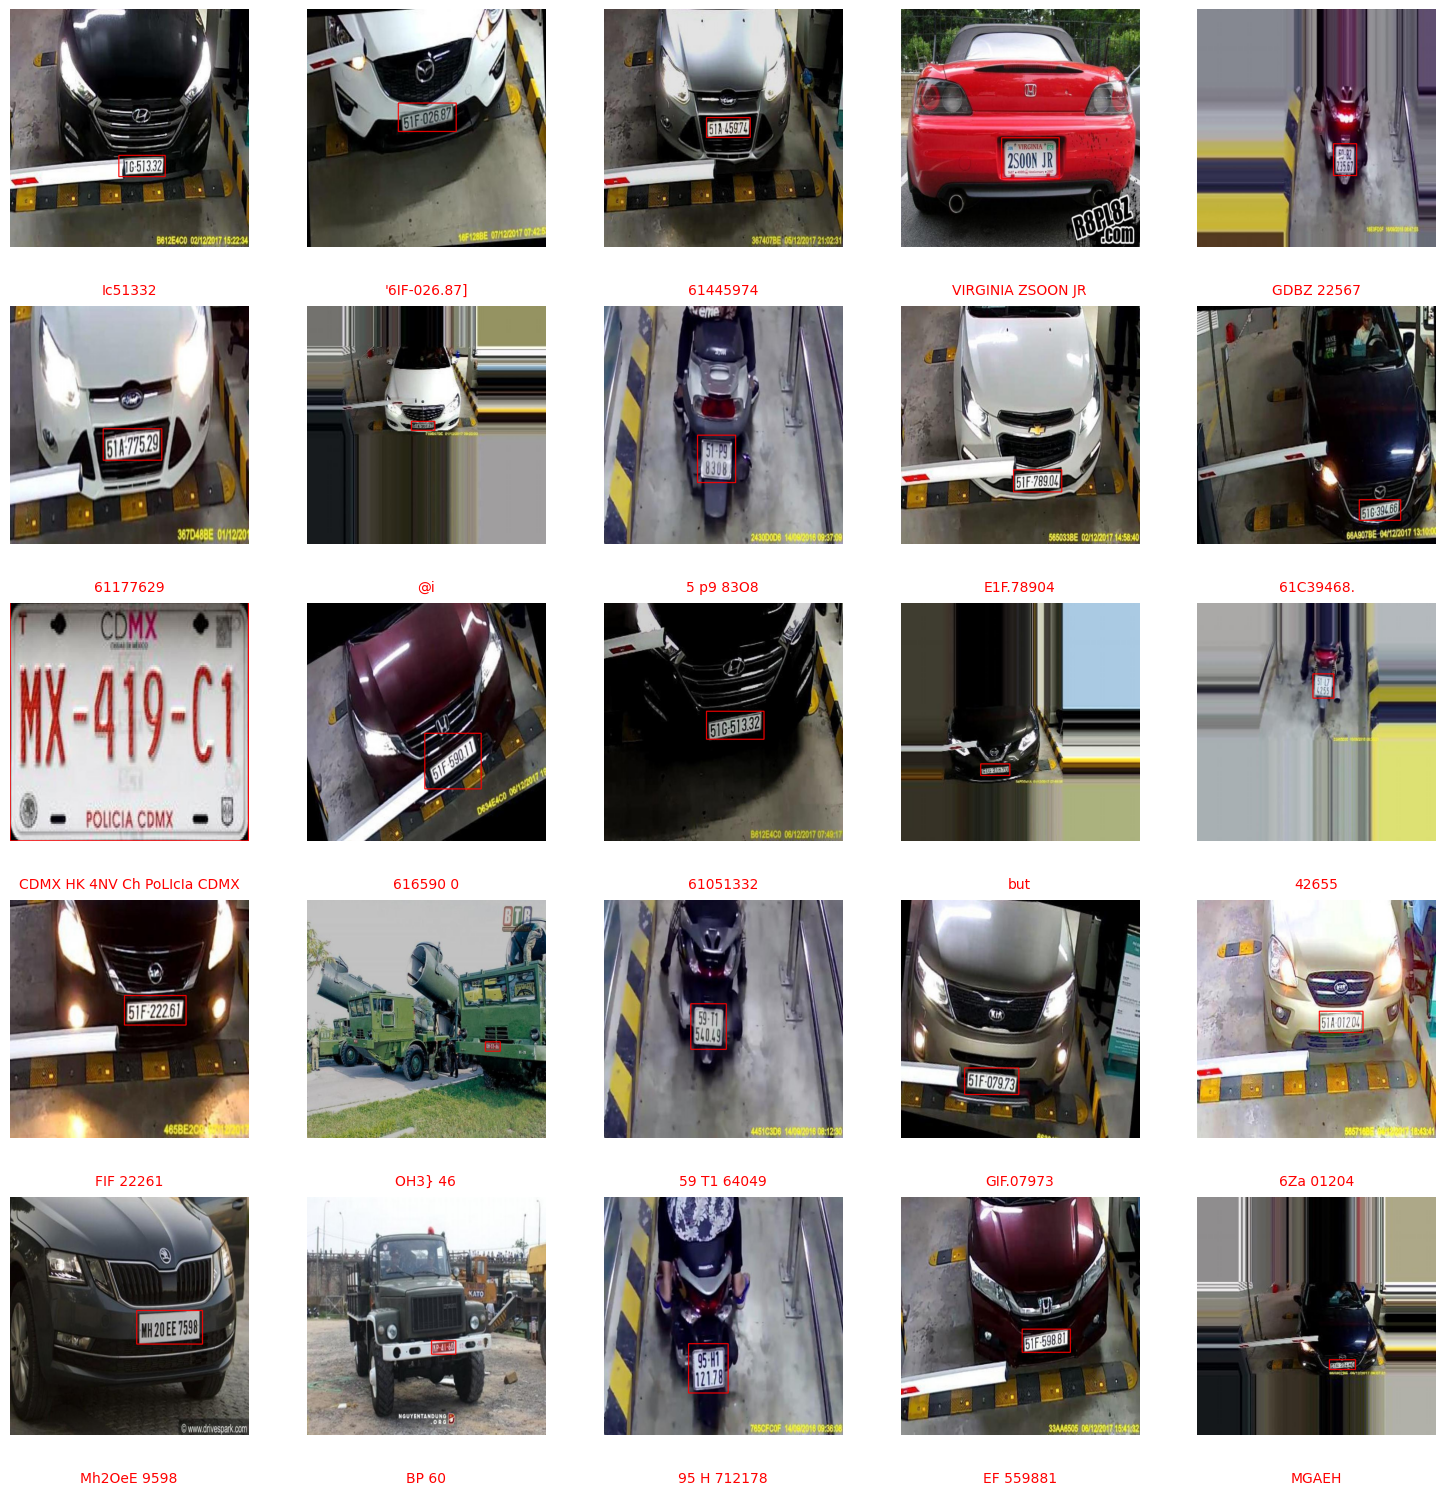

In [8]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import easyocr
import numpy as np

# Using easyocr to extract license plates and plotting 25 random images along with the extracted license plate

reader = easyocr.Reader(['en'])

plt.figure(figsize=(15, 15))

for i, img_path in enumerate(random_images):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    
    detections = trained_model(img_path)[0].boxes.data.tolist()

    extracted_texts = []  

    if len(detections) > 0:
        bbox = detections[0][:5]
        x1, y1, x2, y2, conf_score = bbox
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        roi = img[y1:y2, x1:x2]

        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

        # Perform OCR using EasyOCR
        result = reader.readtext(gray)
        extracted_text = " ".join([text[1] for text in result])
        extracted_text = extracted_text.strip()  
        
        if extracted_text:
            extracted_texts.append(extracted_text)

        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)

    text_display = "\n".join(extracted_texts) if extracted_texts else "No Text Detected"

    plt.subplot(5, 5, i + 1)
    plt.imshow(img_rgb)
    plt.axis("off")

    plt.text(0.5, -0.15, text_display, ha='center', va='top', transform=plt.gca().transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()